In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Question 1 - Extracting Tesla Stock Data Using yfinance

In [4]:
tsla = yf.Ticker("TSLA")

In [5]:
tesla_data = tsla.history(period="max")
tesla_data.reset_index(inplace=True)

In [6]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [35]:
tesla_html_data = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm").text

In [36]:
tesla_soup = BeautifulSoup(tesla_html_data, 'html.parser')

In [37]:
tesla_revenue = pd.DataFrame(columns=["Date","Revenue"])

In [38]:
tables = tesla_soup.find_all('table') # store first table found
revenue_table = "" # Create an empty variable to transfer relevant table info

for table in tables:  # Loop through the initial table
    if "Tesla Quarterly Revenue" in table.text:  # Check if this exists inside the text
        revenue_table = table  # if it does then it transfers it to the relevant_table variable
        break

In [39]:
if revenue_table:
    revenue_tbody = revenue_table.find("tbody") # find the first tbody found
    if revenue_tbody: # Checks if the table exists
        for row in revenue_tbody.find_all("tr"): 
            col = row.find_all("td")
            date = col[0].text.strip()
            revenue = col[1].text.strip()
            tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

In [40]:
tesla_revenue.tail()

,Date,Revenue
49,2010-06-30,$28
50,2010-03-31,$21
51,2009-12-31,
52,2009-09-30,$46
53,2009-06-30,$27


# Question 3 - Extracting GameStop Stock Data Using yfinance

In [13]:
gme = yf.Ticker("GME")

In [14]:
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

In [15]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [41]:
gme_html_data = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html").text

In [42]:
gme_soup = BeautifulSoup(gme_html_data,"html.parser")

In [43]:
gme_revenue = pd.DataFrame(columns=["Date","Revenue"])

In [44]:
tables = gme_soup.find_all("table") # find the table on the parsed HTML
revenue_table = "" # make an empty table for the revenue

for table in tables:
    if 'GameStop Quarterly Revenue' in table.text:
        revenue_table = table
        break

if revenue_table:
    revenue_tbody = revenue_table.find("tbody") # this is important as it only looks through the main body aka the tbody not the theader or tfoot
    
    for row in revenue_tbody.find_all("tr"):
        col = row.find_all("td")
        date = col[0].text
        revenue = col[1].text
        gme_revenue = pd.concat([gme_revenue,pd.DataFrame({"Date": [date], "Revenue": [revenue]})],ignore_index=True)

In [45]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475
61,2005-01-31,$709


# Question 5 - Tesla Stock and Revenue Dashboard

In [52]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Stock Data", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [50]:
# Remove dollar signs and commas
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',', '')
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace('$', '')
# Remove an null or empty strings
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

/tmp/ipykernel_1090/354417221.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1090/354417221.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1090/354417221.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



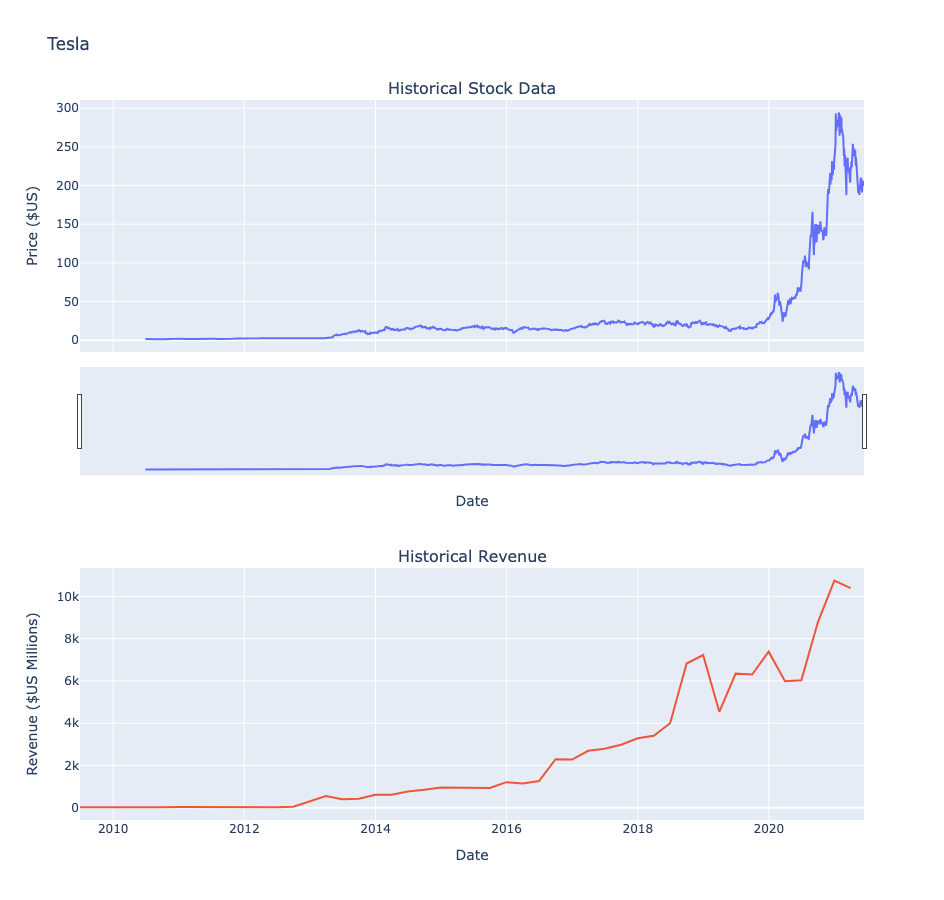

In [53]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

In [55]:
# Remove dollar signs and commas
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',', '')
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace('$', '')
# Remove an null or empty strings
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

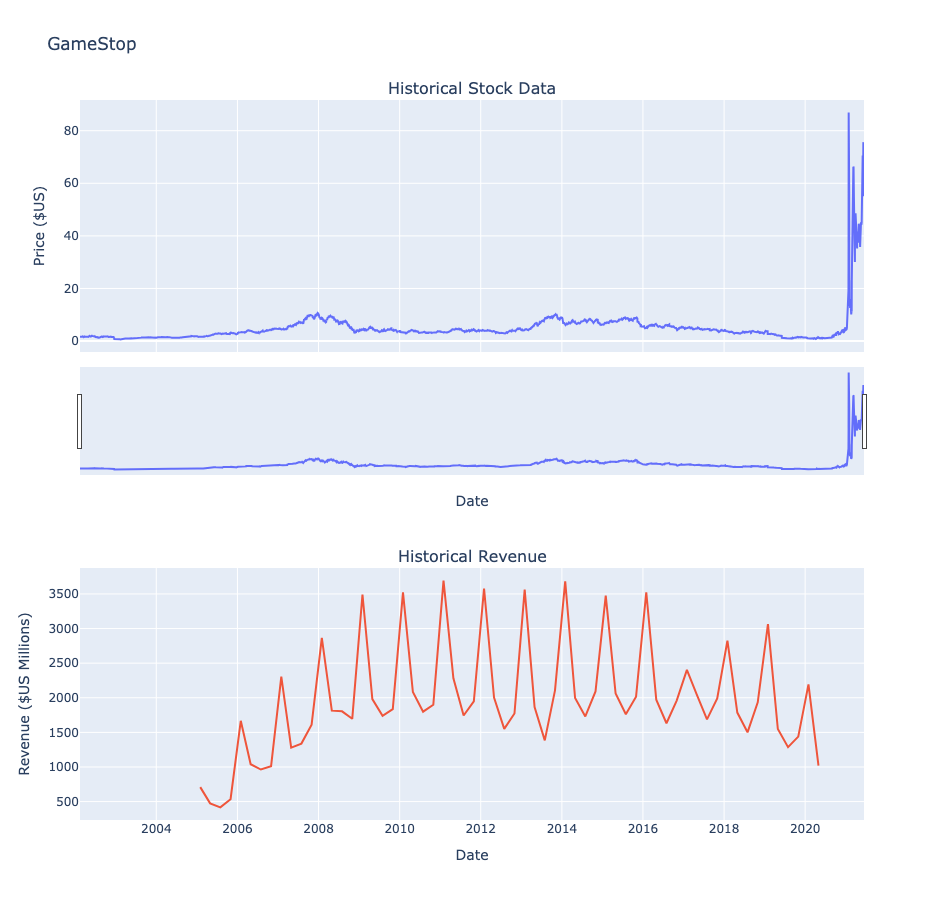

In [56]:
make_graph(gme_data, gme_revenue, 'GameStop')